In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import chi2

import requests
from bs4 import BeautifulSoup

import pandas as pd

%load_ext autoreload
%autoreload 2

In [2]:
headers = {'User-Agent': 
           'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/47.0.2526.106 Safari/537.36'}

wiki = "https://en.wikipedia.org/wiki/Men%27s_100_metres_world_record_progression"

#Get URL
pageTree = requests.get(wiki, headers=headers)

#Scrape webpage
pageSoup = BeautifulSoup(pageTree.content, 'html.parser')

In [3]:
table = pageSoup.find_all('table')[4]
df = pd.read_html(str(table))
df = pd.concat(df)


In [4]:
df.drop(['Duration of record', 'Notes[note 2]','Location of race', 'Wind', 'Auto', 'Athlete', 'Nationality'], axis=1, inplace=True)

In [5]:
df['Year'] = df['Date'].str[-4: ]

In [6]:
new_df = pd.DataFrame(df, columns = ['Time', 'Year'])

In [7]:
#Wikipedia's data for men 100m times under "Records since 1977" section filtered to display just the times and the corresponding year

new_df

,Time,Year
0,10.06,1964
1,10.03,1968
2,10.02,1968
3,9.95,1968
4,9.93,1983
5,9.83,1987
6,9.93,1987
7,9.93,1988
8,9.79,1988
9,9.92,1988


In [8]:
X = new_df['Year']
Y = new_df['Time']
X = X.astype(float)

In [9]:
def best_fit_line(X,Y):
    m = (((X.mean() * Y.mean()) - (X * Y).mean() ) /
         ( (X.mean()) ** 2 - (X ** 2 ).mean() ))

    b = Y.mean() - m * X.mean()

    return m, b

In [10]:
m, b  = best_fit_line(X, Y)

In [11]:
print(f"regression line: y = {round(m,4)}x + {round(b,4)}")

regression line: y = -0.0074x + 24.6481


In [12]:
predicted_times = []
future_year = []
#Predicted men 100m times with the corresponding years from 2023-2030
for year in range(2023, 2031):
    X_prediction = year
    Y_prediction = (m * X_prediction)+b
    print(f"(Year, Predicted 100 m times): ({round(X_prediction,4)}, {round(Y_prediction,4)})")
    
    #Store predicted times with corresponding years at every iteration of for loop
    predicted_times.append(Y_prediction)
    future_year.append(X_prediction)

(Year, Predicted 100 m times): (2023, 9.6149)
(Year, Predicted 100 m times): (2024, 9.6075)
(Year, Predicted 100 m times): (2025, 9.6001)
(Year, Predicted 100 m times): (2026, 9.5926)
(Year, Predicted 100 m times): (2027, 9.5852)
(Year, Predicted 100 m times): (2028, 9.5778)
(Year, Predicted 100 m times): (2029, 9.5703)
(Year, Predicted 100 m times): (2030, 9.5629)


In [13]:
# y values of regression line
regression_line = [(m*x)+b for x in X]

def squared_error(ys_orig, ys_line):
    return sum((ys_line - ys_orig) * (ys_line - ys_orig)) # helper function to return the sum of the distances between the two y values squared

def R_squared_value(ys_orig,ys_line):
    squared_error_regr = squared_error(ys_orig, ys_line) # squared error of regression line
    y_mean_line = [np.mean(ys_orig) for y in ys_orig] # horizontal line (mean of y values)
    squared_error_y_mean = squared_error(ys_orig, y_mean_line) # squared error of the y mean line
    return 1 - (squared_error_regr/squared_error_y_mean)

R_squared = R_squared_value(Y, regression_line)
print(f"R^2 value: {round(R_squared,2)}")

R^2 value: 0.84


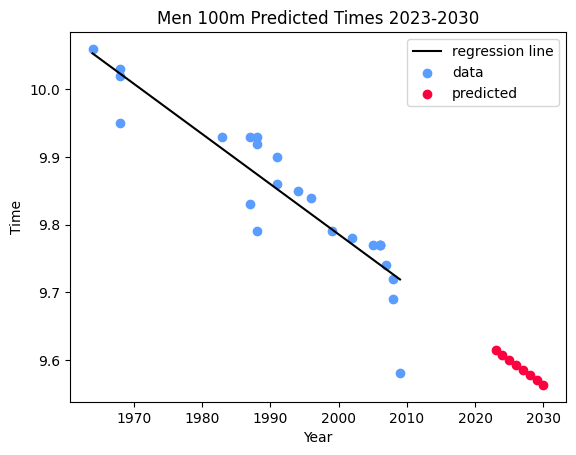

In [14]:

plt.title('Men 100m Predicted Times 2023-2030')
plt.scatter(X, Y,color='#5b9dff',label='data')
plt.scatter(future_year, predicted_times, color='#fc003f', label="predicted")
plt.plot(X, regression_line, color='000000', label='regression line')
plt.xlabel('Year')
plt.ylabel('Time')
plt.legend(loc=1)
plt.savefig('100m_Predicted_2023-2030.png', bbox_inches='tight', pad_inches=0)